Importación de tablas

In [63]:
from sqlalchemy import create_engine
import pandas as pd

usuario = "root"
clave = ""
host = "127.0.0.1"
puerto = "3306"
nombre_bd = "practica"

engine = create_engine(f"mysql+pymysql://{usuario}:{clave}@{host}:{puerto}/{nombre_bd}")

empleados = pd.read_sql("SELECT * FROM em_empleados", engine)
proyectos = pd.read_sql("SELECT * FROM pr_proyectos", engine)
empleados_proyecto = pd.read_sql("SELECT * FROM pr_empleados_proyecto", engine)

Top 5 empleados más antiguos

In [64]:
empleados.sort_values("f_alta").head(5)

,id_empleado,tx_apellido1,tx_apellido2,cx_edocivil,tx_email,f_alta,f_baja,f_nacimiento,b_formacionu,tx_nif,tx_nombre,n_telefono1,n_telefono2
7,14,Gómez,López,C,mgomez@fs.com,2017-02-25,None,1996-05-24,N,64152054B,Martín,675412898,913241547
4,5,Salinas,Irureta,S,jsalinas@fs.com,2017-03-08,None,1969-12-31,S,40578463H,Julio,698785521,605412241
1,2,Garcia,Perez,S,agarcia@fs.com,2019-01-08,None,2003-06-09,N,36525698C,Anton,611234552,698532328
5,9,Gonzalez,Gomez,S,agonzales@fs.com,2020-08-04,None,2005-02-23,S,25457631S,Alejandro,659845143,654918061
2,3,Sanchez,Perez,C,fsanchez@fs.com,2021-11-01,None,1999-12-31,S,89596565D,Francisco,633029869,956688741


Top 5 empleados más recientes

In [65]:
empleados.sort_values("f_alta", ascending=False).head(5)

,id_empleado,tx_apellido1,tx_apellido2,cx_edocivil,tx_email,f_alta,f_baja,f_nacimiento,b_formacionu,tx_nif,tx_nombre,n_telefono1,n_telefono2
3,4,Sanchez,Montalbo,S,psanchez@fs.com,2025-02-21,None,1987-02-26,S,36525698C,Pablo,659845140,654918060
0,1,Giraldez,Fidalgo,S,pgiraldez@fs.com,2023-07-21,None,1960-07-20,S,89417145J,Pascual,647250014,985452011
6,11,Cruzado,Martin,S,acruzado@fs.com,2022-02-21,None,2002-07-25,S,53084562K,Antonio,641054789,987514225
2,3,Sanchez,Perez,C,fsanchez@fs.com,2021-11-01,None,1999-12-31,S,89596565D,Francisco,633029869,956688741
5,9,Gonzalez,Gomez,S,agonzales@fs.com,2020-08-04,None,2005-02-23,S,25457631S,Alejandro,659845143,654918061


Distribución del número de años de los empleados en la empresa

2023-07-21 1
2019-01-08 6
2021-11-01 3
2025-02-21 0
2017-03-08 8
2020-08-04 4
2022-02-21 3
2017-02-25 8


<Axes: >

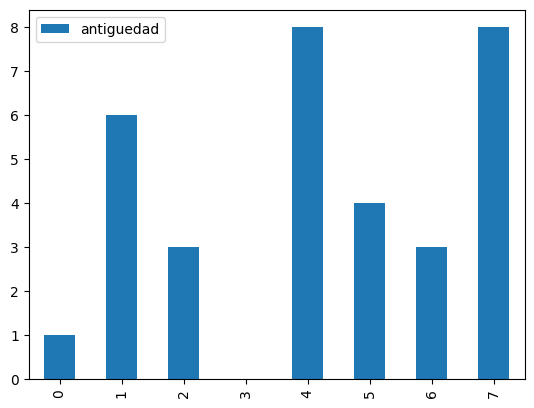

In [114]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
hoy = date.today()

antiguedades = []

for empleado in empleados.values:
    antiguedad = relativedelta(hoy, empleado[5]).years
    print(empleado[5], antiguedad)
    antiguedades.append(int(antiguedad))

antiguedades_df = pd.DataFrame(antiguedades, columns = ["antiguedad"])

antiguedades_df.plot(kind="bar")
    

Evolución de las altas por año

<Axes: title={'center': 'Evolución de altas por año'}, xlabel='Año de alta', ylabel='Número de altas'>

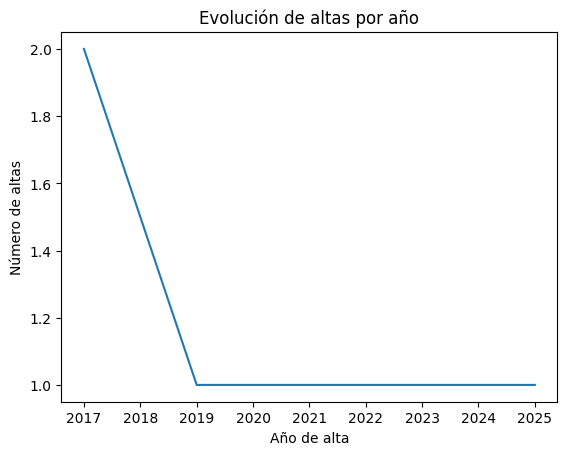

In [ ]:

altas_years = pd.DatetimeIndex(empleados["f_alta"]).year.value_counts().sort_index()

altas_years.plot(title="Evolución de altas por año", xlabel = "Año", ylabel="Número de altas")


Evolución de bajas por años

<Axes: title={'center': 'Evolución de bajas por año'}, xlabel='Año', ylabel='Número de bajas'>

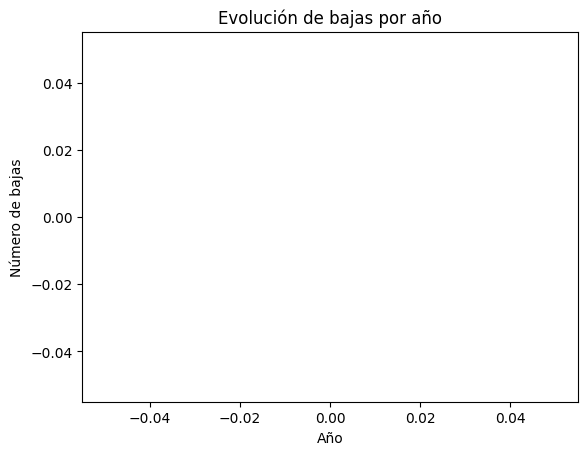

In [71]:
bajas_years = pd.DatetimeIndex(empleados["f_baja"]).year.value_counts().sort_index()

bajas_years.plot(title="Evolución de bajas por año", xlabel = "Año", ylabel="Número de bajas")


Años con mayor crecimiento/decrecimiento

Distribución de empleados solteros y casados

cx_edocivil
C    2
S    6
Name: count, dtype: int64


<Axes: xlabel='cx_edocivil'>

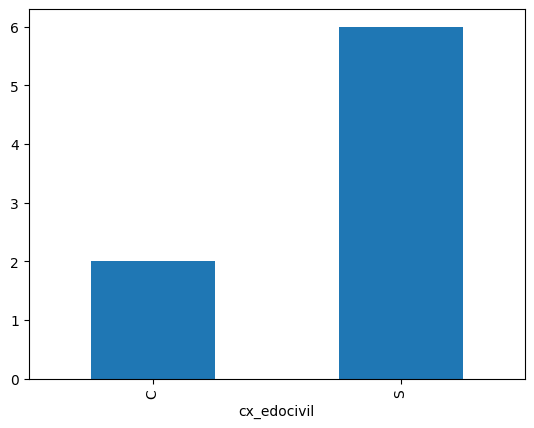

In [ ]:
edos = empleados["cx_edocivil"].value_counts().sort_index()

edos.plot(kind="bar")

Distribución de edades de los empleados

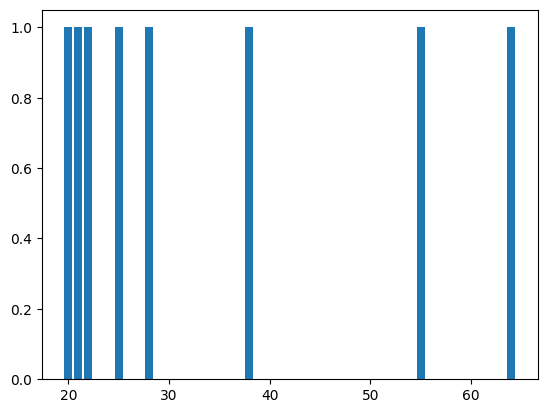

In [120]:


edades = []

for fNac in empleados["f_nacimiento"].values:
    edad = hoy - fNac
    edad_years = relativedelta(hoy, fNac).years
    edades.append(edad_years)
    

edades_df = pd.DataFrame(edades, columns = ["edad"])

x = np.array(edades)
y = np.array(edades_df.value_counts().sort_index())

plt.bar(x,y)
plt.show()
    

Edad media y desviación típica de los empleados

In [142]:
import statistics

edadMedia = edades_df.mean().values[0]
desvTipica = statistics.stdev(edades)

print(f"Edad media empleados: {edadMedia:.2f} años")
print(f"Desviación típica empleados: {desvTipica:.2f} años")


Edad media empleados: 34.12 años
Desviación típica empleados: 16.83 años


Proyectos

Número de proyectos activos, finalizados y total

In [169]:
from datetime import datetime

countActive = 0
countFinished = 0
countTotal = len(proyectos.values)

for proyecto in proyectos[["f_baja","f_fin"]].values:
    fBaja = proyecto[0]
    fFin = proyecto[1]
    if fBaja == None:
        countActive += 1
    if fFin and fFin < hoy:
        countFinished += 1

print(countActive)
print(countFinished)
print(countTotal)

7
0
7
